In [2]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.optimize as spo
import Utils

from StockDataSource import YahooDataSource
from StockPricePredictor import StockPricePredictor

In [3]:
%matplotlib inline

In [4]:
start = datetime(2015, 1, 4)
end = datetime(2016, 1, 4)

days = [1, 7, 30]
tickers = ['GOOGL']

dates = map(lambda days: end + timedelta(days=days), days)
print "Will predict {} -> {} days in future (i.e. {})".format(str(tickers), str(days), str(dates))

predictor = StockPricePredictor()
predictor.fit(tickers, start, end)
predicted = predictor.predict(tickers, dates)
real = predictor.real(tickers, dates)

print predicted
print real

Will predict ['GOOGL'] -> [1, 7, 30] days in future (i.e. [datetime.datetime(2016, 1, 5, 0, 0), datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2016, 2, 3, 0, 0)])
{'GOOGL': array([ 761.530029,  733.070007,  749.380005])}
{'GOOGL': array([ 761.530029,  733.070007,  749.380005])}


IBM     14.616955
GLD      7.561147
AAPL    17.814639
SPY     10.699890
dtype: float64


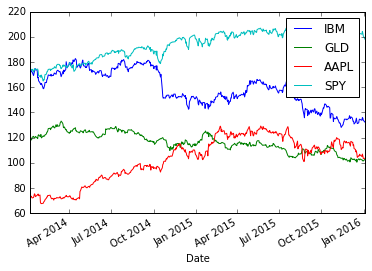

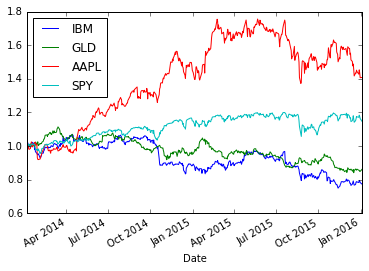

In [5]:
ticker_symbols = ['IBM', 'GLD', 'AAPL', 'SPY']
start = datetime(2014, 1, 4)
end = datetime(2016, 1, 4)

df, normalized = predictor.fit(ticker_symbols, start, end)
print df.std()
_ = df.plot()
_ = normalized.plot()

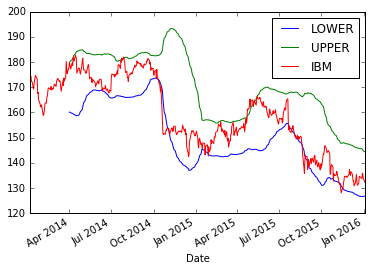

In [6]:
bands = Utils.get_bollinger_bands(df['IBM'], 60)
bands['IBM'] = df['IBM']
_ = bands.plot()

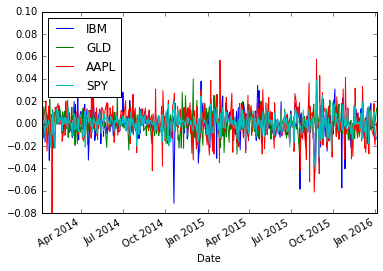

In [7]:
returns = Utils.get_daily_returns(df)

_ = returns.plot()

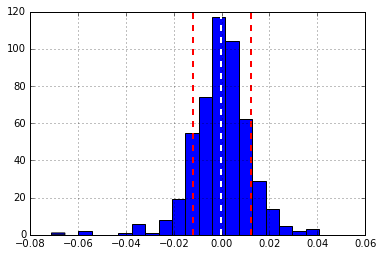

Kurtosis: 4.4673614979


In [8]:
#change = df.pct_change().ix[1:]
#_ = plt.hist(change['IBM'], bins=20)
ibm_ret = returns['IBM']
ibm_ret.hist(bins=20)
mean = ibm_ret.mean()
std = ibm_ret.std()
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

print "Kurtosis: {}".format(ibm_ret.kurtosis())

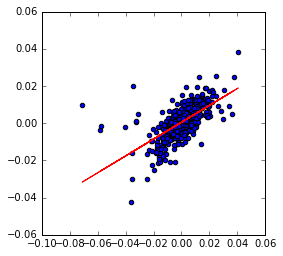

Beta: 0.452324854449


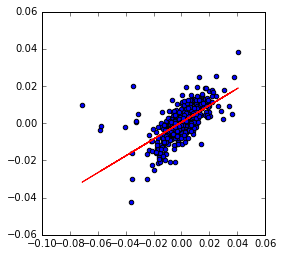

Beta:  0.452324854449
Alpha:  0.000506935216203


In [9]:
from sklearn import linear_model
from sklearn import cross_validation

regr = linear_model.LinearRegression()
X = returns['IBM'].reshape(-1, 1)
y = returns['SPY'].values
regr.fit(X, y)

fig = plt.figure(figsize=(4, 4))
_ = plt.scatter(X, y)
_ = plt.plot(X, regr.predict(X), color='red', linewidth=1)
plt.show()
print "Beta: {}".format(regr.coef_[0])

beta,alpha = np.polyfit(returns['IBM'], returns['SPY'], 1)

fig = plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(returns['IBM'], beta*returns['IBM'] + alpha, '-', color='r')
plt.show()
print "Beta: ", beta
print "Alpha: ", alpha

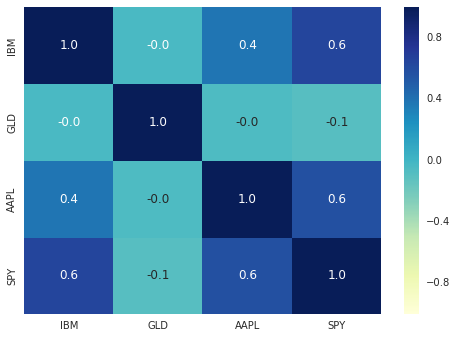

In [10]:
import seaborn as sns
sns.heatmap(returns.corr(), annot=True, fmt='.1f', cmap='YlGnBu')

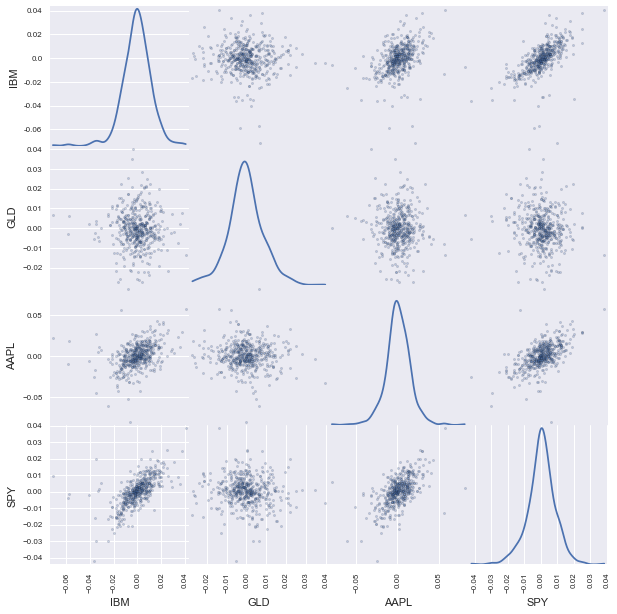

In [11]:
_ = pd.scatter_matrix(returns, alpha = 0.3, figsize=(10, 10), diagonal = 'kde')

Cumulative return:  0.0185195743049
Average daily ret:  1098.0979775
Std of daily ret:   59.5567983613
Sharpe ratio:       18.4378211964
Sharpe ratio ann:   292.691337622


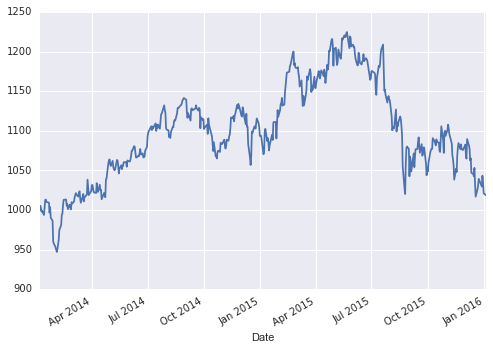

In [11]:
from Portfolio import Portfolio 

p = Portfolio(normalized, [0.4, 0.2, 0.3, 0.1], 1000)
p.port_val.plot()
p.print_stats()